In [2]:
import librosa
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from torch import nn
import torchaudio
import torchvision

In [3]:
cv_path = './cv-corpus-19.0-2024-09-13/en'
df = pd.read_csv(f'{cv_path}/train.tsv', sep='\t', header=0)

/tmp/ipykernel_1007/1247204797.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{cv_path}/train.tsv', sep='\t', header=0)


In [17]:
# Print first column
# For some reason, df[0] gives a KeyError, but this works...
df[:1]

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,e6e86bf2343dfd28fc27eb798c1f12d42a909c2a9eb931...,common_voice_en_35390714.mp3,c6fa7671e6084d554916f618a5c99be045d027b544ff29...,Some differences exist between eukaryotes and ...,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN


In [5]:
clip_path = f'{cv_path}/clips/{df["path"][0]}'
# See https://pytorch.org/audio/main/generated/torchaudio.transforms.MelSpectrogram.html
waveform, sample_rate = torchaudio.load(clip_path, normalize=True)
transform = torchaudio.transforms.MelSpectrogram(sample_rate)
# mel_specgram is a tuple containing (channel, n_mels, time)
mel_specgram = transform(waveform)

/nix/store/23yc4rxhhiifj0jvasrac5lg5s7a7dni-python3-3.11.10-env/lib/python3.11/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [6]:
# Taken from https://pytorch.org/audio/main/tutorials/audio_feature_extractions_tutorial.html#preparation
def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest")

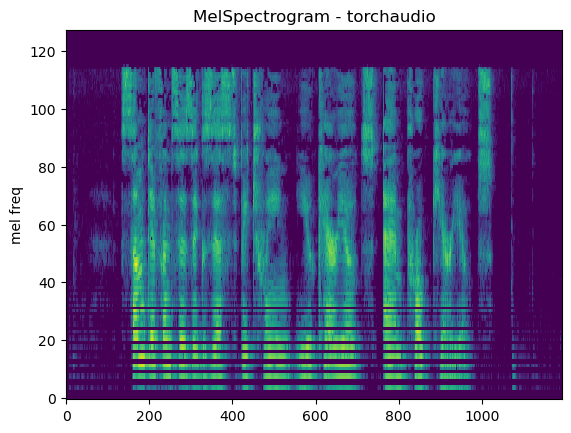

In [7]:
plot_spectrogram(mel_specgram[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

In [35]:
df[df['age'].isin(['nineties'])]

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
28311,00ba7ba9297a6fcaa585773049a36c25176b215a56067c...,common_voice_en_19688695.mp3,1f152f9fd239dfe1c18276d46083f9885ea04fc2d67b85...,This is a typical sea breeze.,NaN,2,0,nineties,NaN,NaN,NaN,en,NaN
28312,00ba7ba9297a6fcaa585773049a36c25176b215a56067c...,common_voice_en_19688697.mp3,1f1d989de8b2df3db711d1df7afbfa699bdc28d5997efa...,"The village hosts several shops, pubs and eate...",NaN,2,1,nineties,NaN,NaN,NaN,en,NaN
28313,00ba7ba9297a6fcaa585773049a36c25176b215a56067c...,common_voice_en_19688698.mp3,1f1123a9dabf685b55164bdb872d40ab37964ffb241c9c...,The stigma are entire or three-lobed; a beak i...,NaN,2,0,nineties,NaN,NaN,NaN,en,NaN
28314,00ba7ba9297a6fcaa585773049a36c25176b215a56067c...,common_voice_en_19688699.mp3,1f0853f2b34b88fc3b3f285d7672598a5074e477e692d4...,"According to Irish ""Brehon Laws,"" a marriage b...",NaN,2,0,nineties,NaN,NaN,NaN,en,NaN
28315,00ba7ba9297a6fcaa585773049a36c25176b215a56067c...,common_voice_en_19688700.mp3,1f20a2dc48479710f28a78fa97123a32c911efc31c9050...,She then began working with hockey players to ...,NaN,3,0,nineties,NaN,NaN,NaN,en,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384024,a832c76013f233e214baeefa9691b681581684f542fc8a...,common_voice_en_37971858.mp3,d2e3c9ae60c3057bc2affcfe6dca9c19132df7985451fe...,"The name ""morinda"" derives from the tree's nam...",NaN,4,0,nineties,male_masculine,England English,NaN,en,NaN
384025,a832c76013f233e214baeefa9691b681581684f542fc8a...,common_voice_en_37971868.mp3,d2f3d1f80d2623e35781e62f63a50b1198e14050eba715...,"Canton, the largest city in Fulton County, is ...",NaN,4,0,nineties,male_masculine,England English,NaN,en,NaN
384026,a832c76013f233e214baeefa9691b681581684f542fc8a...,common_voice_en_37971869.mp3,d2ceb1b38aefcf73d479fb7bc62c94eeb6fb2edf9477c2...,"Perkins was succeeded in office by his son, Ca...",NaN,4,0,nineties,male_masculine,England English,NaN,en,NaN
384027,a832c76013f233e214baeefa9691b681581684f542fc8a...,common_voice_en_37971879.mp3,d2f751f2cd1a46d0491998e2d056d3154ba1fe716719ac...,It occasionally also referred to the Zanzibar ...,NaN,2,0,nineties,male_masculine,England English,NaN,en,NaN


In [4]:
df[df['gender'].isin([np.NaN])]

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,e6e86bf2343dfd28fc27eb798c1f12d42a909c2a9eb931...,common_voice_en_35390714.mp3,c6fa7671e6084d554916f618a5c99be045d027b544ff29...,Some differences exist between eukaryotes and ...,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
1,e6e86bf2343dfd28fc27eb798c1f12d42a909c2a9eb931...,common_voice_en_35390716.mp3,c6d44521804dd6d7861f1ef62724564ab2d412b2a16899...,"‘You don’t seem to mind it,’ observed Bob.",NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
2,e6e86bf2343dfd28fc27eb798c1f12d42a909c2a9eb931...,common_voice_en_35390717.mp3,c6f474c62c583b90e66f8d11eda514b067683ce7d6b676...,"But this time, it's different.",NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
3,e6ee693358a24450e38185ea324c48a9626b2e7515d4ea...,common_voice_en_17280426.mp3,f2daecd0ccb0e31dda418615f9b72a5a,The convenience store manager was mad at the u...,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
4,e6ef88404179e958b61f65ffdac36c2a357306a53765d7...,common_voice_en_23361615.mp3,6a292889c808671942445e7e4e7557dd2cff5b24dd47f7...,Elevators are characteristic to skyscrapers.,NaN,2,1,NaN,NaN,NaN,NaN,en,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103391,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_en_29127643.mp3,bf9de394822f5f7f0dd5562b0d9a5c6e79054ce0d3d897...,Former prominent residents include Thomas Holme.,NaN,4,0,NaN,NaN,"German English,Non native speaker",NaN,en,NaN
1103392,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_en_29127651.mp3,bf1201325ad0751a44d2cd7a27b233f77ca79ddd3ef64f...,Johnson was taken to a hospital to treat his w...,NaN,4,0,NaN,NaN,"German English,Non native speaker",NaN,en,NaN
1103393,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_en_29127654.mp3,bfa61c5039ed27f0d77e0fce25366952ce23ad15218295...,The performance marked the first time Dylan pe...,NaN,4,0,NaN,NaN,"German English,Non native speaker",NaN,en,NaN
1103394,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_en_29127657.mp3,bfa10c0c128bc7822281b38df3f8144f98e0637ef88fe9...,Writing she did well and delicately — but spel...,NaN,4,0,NaN,NaN,"German English,Non native speaker",NaN,en,NaN
